# DAY 7 Homework

### 1.列出 AMT_ANNUITY 的 q0 - q100



In [22]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = '../Data/'

In [32]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../Data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
"""
YOUR CODE HERE
"""
# 1: 計算 AMT_ANNUITY 的 q0 - q100
q_all = [np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q =i) for i in range(101)]

pd.DataFrame({'q': list(range(101)),
              'value': q_all})

,q,value
0,0,-0.500000
1,1,-0.482187
2,2,-0.479975
3,3,-0.475588
4,4,-0.472359
5,5,-0.471200
6,6,-0.471200
7,7,-0.469042
8,8,-0.466813
9,9,-0.465339



### 2.1 將 AMT_ANNUITY 中的 NAs 暫時以中位數填補


In [33]:
app_train[app_train['AMT_ANNUITY'] == app_train['AMT_ANNUITY'].isnull()] = np.median(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'])


### 2.2 將 AMT_ANNUITY 的數值標準化至 -1 ~ 1 間


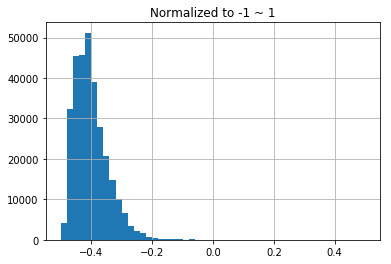

In [34]:
value = app_train['AMT_ANNUITY'].values
app_train['AMT_ANNUITY'] = (( value - min(value) ) / (max(value) - min(value)) - 0.5)
app_train['AMT_ANNUITY'].hist(bins = 50)
plt.title("Normalized to -1 ~ 1")
plt.show()


### 3.將 AMT_GOOD_PRICE 的 NAs 以眾數填補


In [38]:
from collections import defaultdict

start_time = time.time()
mode_dict = defaultdict(lambda:0)

for value in app_train[~app_train['AMT_GOODS_PRICE'].isnull()]['AMT_GOODS_PRICE']:
    mode_dict[value] += 1
    
mode_get = sorted(mode_dict.items(), key=lambda kv: kv[1], reverse=True)
print(mode_get[0])
print("Elapsed time: %.3f secs" % (time.time() - start_time))

app_train[app_train['AMT_ANNUITY'] == app_train['AMT_ANNUITY'].isnull()] = mode_get[0][0]

(450000.0, 26022)
Elapsed time: 0.270 secs
